In [155]:
import pandas as pd
import seaborn as sns
from copy import deepcopy

%matplotlib notebook
import matplotlib
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("Greek_Names.csv")

In [3]:
del data['isFemale']

In [4]:
start = 2
end = 4

In [5]:
for n in range(start,end):
    data['Column ' + str(n)] = data['Names'].astype(str).str[-n:]

In [6]:
data = pd.DataFrame(data.Names.str.split('-').tolist(), index = data.isMale).stack()
data = data.reset_index()[[0,'isMale']]
data.columns = ['Names', 'isMale']

In [7]:
data = data.drop(data[data.Names.map(len)<2].index)

In [8]:
data = pd.concat(g for _, g in data.groupby('isMale') if len(g)>1)

In [9]:
data = data.sort_values(by='Names')

In [10]:
data = data.reset_index(drop=True)

In [11]:
data

,Names,isMale
0,ΑΑΡΩΝ,1
1,ΑΒΑΓ,1
2,ΑΒΑΓΟΡΙ,1
3,ΑΒΑΙΣ,1
4,ΑΒΕΜΙΡ,1
5,ΑΒΕΡΚΙ,1
6,ΑΒΕΡΚΙΟΣ,1
7,ΑΒΕΡΚΙΟΣ,1
8,ΑΒΕΡΣΑ,0
9,ΑΒΕΣΑΛΩΛ,1


In [12]:
temp = data[0:0]
final = data[0:0]
    
for i in range(len(data)):
    if i == data.index[-1]:
        temp = temp.append(data.iloc[i])
        temp = temp.mode()
        final = final.append(temp.iloc[0])
        temp = temp[0:0]
        break
    else:
        if data.iloc[i]['Names'] == data.iloc[i+1]['Names']:
            temp = temp.append(data.iloc[i])
        else:
            temp = temp.append(data.iloc[i])
            temp = temp.mode()
            final = final.append(temp.iloc[0])
            temp = temp[0:0]
final = final.reset_index(drop=True)

In [76]:
for n in range(start,end):
    final['Column ' + str(n)] = final['Names'].astype(str).str[-n:]

In [165]:
final.loc[final['isMale'] == 0, 'isMale'] = 'Female'
final.loc[final['isMale'] == 1, 'isMale'] = 'Male'
final = final.rename(columns={'isMale' : 'Gender', 'Column 2' : 'Suffix 2', 'Column 3' : 'Suffix 3'})

In [306]:
idx = pd.IndexSlice
ctab = pd.crosstab(final['Suffix 2'],idx[final['Gender']])
ctab

Gender,Female,Male
Suffix 2,,
ΑΑ,1,2
ΑΒ,0,10
ΑΓ,1,2
ΑΔ,0,2
ΑΕ,0,1
ΑΖ,3,10
ΑΗ,9,1
ΑΙ,6,10
ΑΚ,3,21


In [307]:
del ctab.columns.name
del ctab.index.name

In [320]:
ctab = ctab.reset_index(drop=True)

<IPython.core.display.Javascript object>


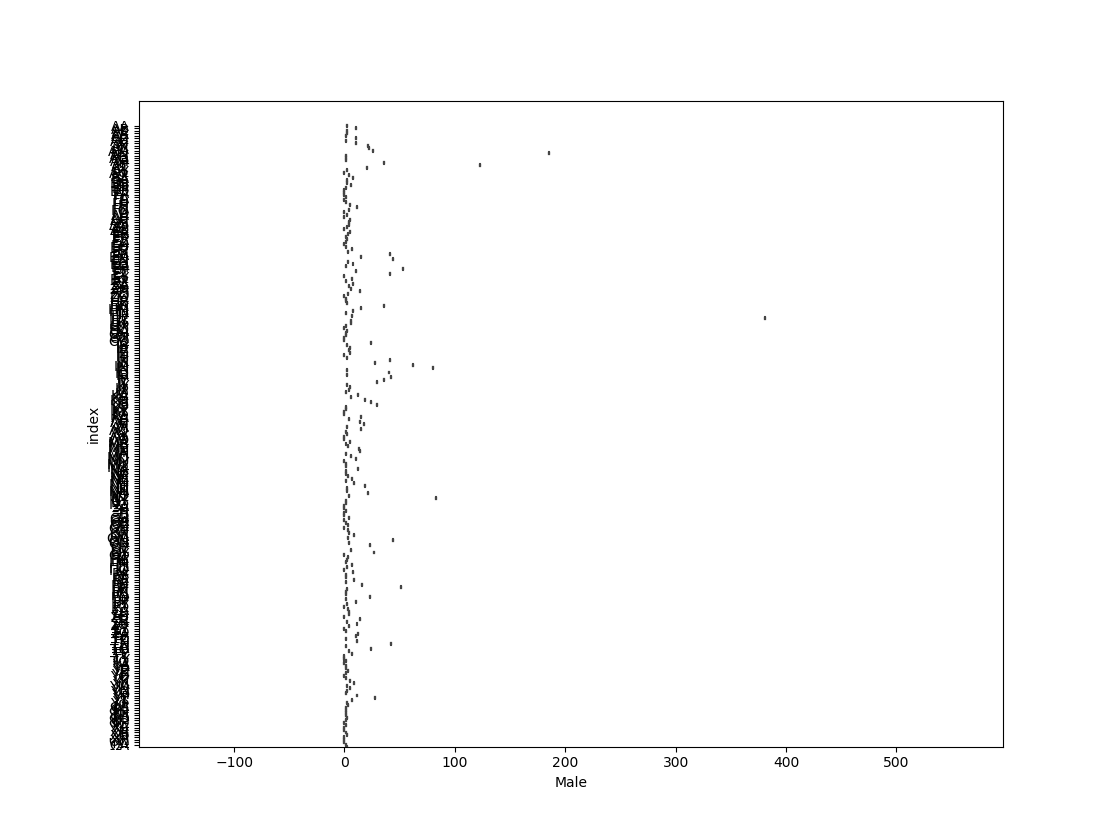

In [338]:
sns.boxplot(x="Male", y="index", data=ctab)
plt.show()